# Churn Analysis
The objective of this case study is to use a classification-based model to predict the Churn.

# Content

* [1. Introduction](#2)
* [2. Business Understanding](#3)
* [3. Data Understanding](#4)
    * [3.1 Load Libraries](#4.1)    
    * [3.2. Load Dataset](#4.2)
    * [3.3. Exploratory Data Analysis (EDA)](#4.3)
    * [3.4. Descriptive Statistics](#4.4)
    * [3.5. Data Visualisation](#4.5)
* [4. Data Preparation](#5)
* [5. Modeling](#6)
    * [5.1 Train / Test Split](#6.1) 
    * [5.2.Linear Regression Model](#6.2) 
* [6.Data Preparation ARIMA Model](#7)        
    * [6.1. Stationary Time Series](#7.1)
    * [6.2. Checks for Stationarity](#7.2)
        * [6.2.1. Summary Statistics](#7.2.1)
        * [6.2.2. Augmented Dickey-Fuller test](#7.2.2)
    * [6.3. Use and Remove Trends](#7.3)
* [7. ARIMA Model](#8)
    * [7.1. Hyperparameters for ARIMA model](#8.1)
* [8. Comparision Linear Regression vs ARIMA](#9)
* [9. References](#10) 

<a id='2'></a>
# 1. Introduction 

<a id='3'></a>
# 2. Business Understanding

<a id='4'></a>
# 3. Data Understanding

## 3.1 Load Libraries

In [1]:
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

## 3.2. Load Dataset

In [2]:
data = pd.read_csv("Telco_Churn.csv")

## 3.3. Exploratory Data Analysis (EDA)

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.shape

(7043, 21)

<a id='4.4'></a>
## 3.4. Descriptive Statistics

In [6]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## 3.5. Data Visualisation

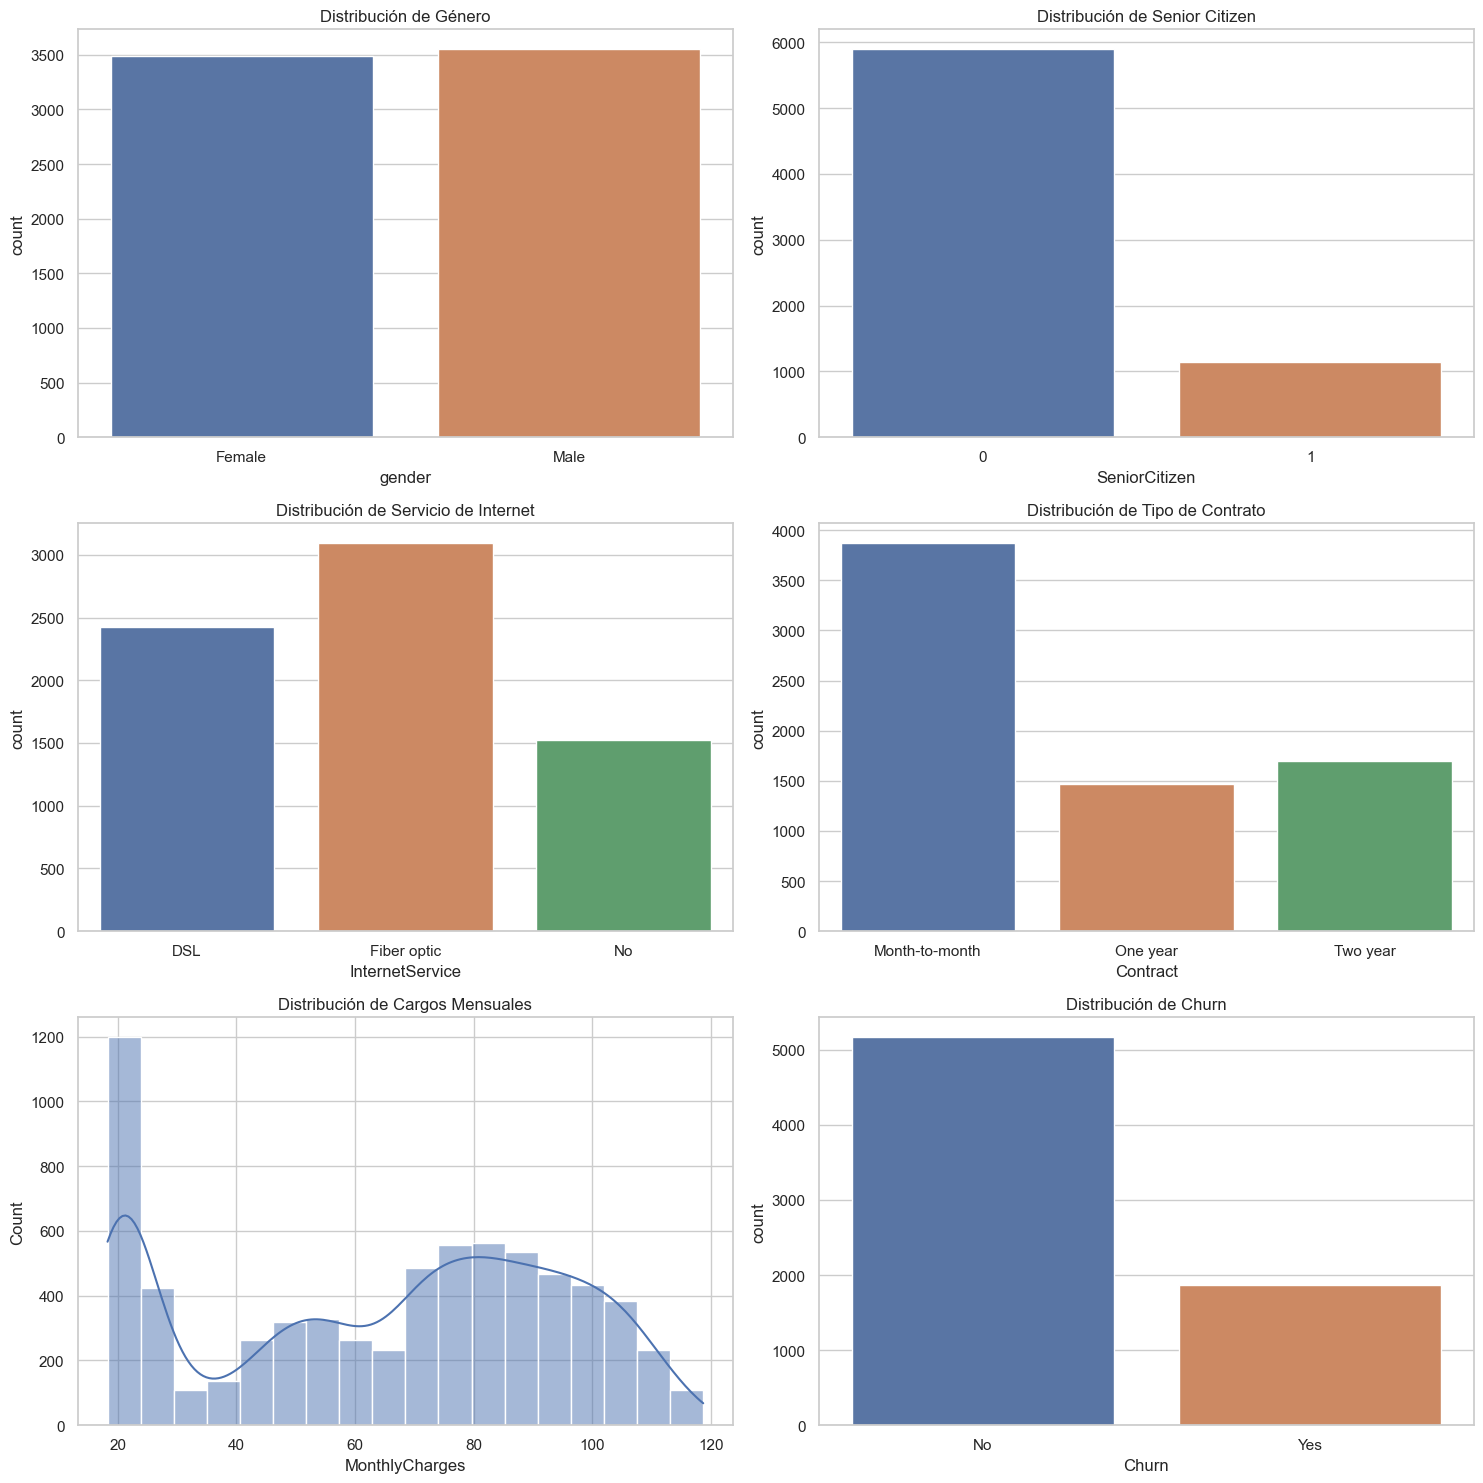

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para los gráficos
sns.set(style="whitegrid")

# Crear una figura con múltiples subgráficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Distribución de Género
sns.countplot(x='gender', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Género')

# Distribución de SeniorCitizen
sns.countplot(x='SeniorCitizen', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Senior Citizen')

# Distribución de InternetService
sns.countplot(x='InternetService', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Servicio de Internet')

# Distribución de Contract
sns.countplot(x='Contract', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Tipo de Contrato')

# Distribución de MonthlyCharges
sns.histplot(data['MonthlyCharges'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribución de Cargos Mensuales')

# Distribución de Churn
sns.countplot(x='Churn', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Distribución de Churn')


plt.tight_layout()
plt.show()

# 4. Data Preparation

# 5. Modeling

## 5.1 Train / Test Split